In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("dfclust.csv")

In [3]:
print(df.shape)
print(df.head(5))

(200, 5)
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score
0           1    Male   19                  15              39
1           2    Male   21                  15              81
2           3  Female   20                  16               6
3           4  Female   23                  16              77
4           5  Female   31                  17              40


In [4]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


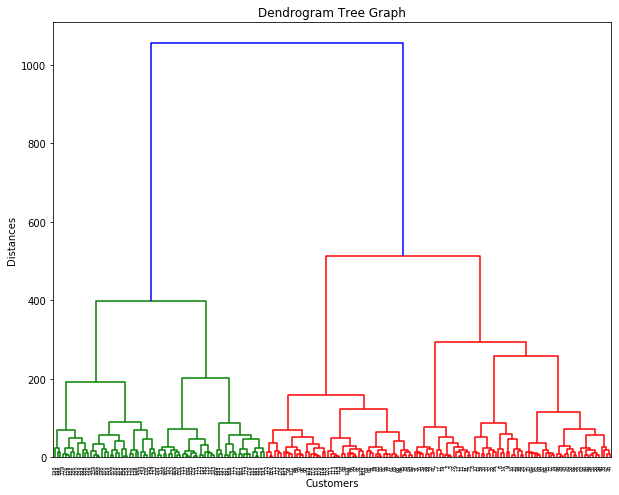

In [8]:
import matplotlib.pyplot as plt

import scipy.cluster.hierarchy as clus

plt.figure(1, figsize = (10 ,8))
dendrogram = clus.dendrogram(clus.linkage(df, method  = "ward"))

plt.title('Dendrogram Tree Graph')
plt.xlabel('Customers')
plt.ylabel('Distances')
plt.show()

In [9]:
from sklearn.cluster import AgglomerativeClustering 
model = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='average')
y_means = model.fit_predict(df)
y_means

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

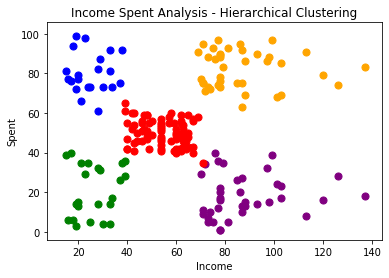

In [10]:
X = df.iloc[:, [3,4]].values
plt.scatter(X[y_means==0, 0], X[y_means==0, 1], s=50, c='purple', label ='Cluster 1')
plt.scatter(X[y_means==1, 0], X[y_means==1, 1], s=50, c='orange', label ='Cluster 2')
plt.scatter(X[y_means==2, 0], X[y_means==2, 1], s=50, c='red', label ='Cluster 3')
plt.scatter(X[y_means==3, 0], X[y_means==3, 1], s=50, c='green', label ='Cluster 4')
plt.scatter(X[y_means==4, 0], X[y_means==4, 1], s=50, c='blue', label ='Cluster 5')
plt.title('Income Spent Analysis - Hierarchical Clustering')
plt.xlabel('Income')
plt.ylabel('Spent')
plt.show()